In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

PARAMS_NOT_IMPLEMENTED = ['OPT', 'ItoC', 'QInv']

simulation_output = "./bucld-42-simulation-output78.csv"

df = pd.read_csv(simulation_output)
df.shape  # (num-rows, num-columns)

(307200, 27)

In [2]:
# the column names that store the learned param values
parameter_names = [p
                   for p in df.columns 
                   if '_' not in p and p != 'lang']
parameter_names[:3]

['SP', 'HIP', 'HCP']

In [3]:
def int2binstr(i):
    "Returns a 13-bit binary repr of a number"
    return format(i, '013b')

def param_name_to_int(param):
    """ Converts a parameter name into its integer equivalent, 
    derived from its position in the grammar bitstring """
    
    return 1 << (len(parameter_names) - parameter_names.index(param) - 1)

In [4]:
import math
pd.DataFrame(
    [(p, 
      int(math.log(param_name_to_int(p), 2))+1, 
      param_name_to_int(p))
        for p in parameter_names],
    columns=['param name', 'param number', 'bitstring value'])

,param name,param number,bitstring value
0,SP,13,4096
1,HIP,12,2048
2,HCP,11,1024
3,OPT,10,512
4,NS,9,256
5,NT,8,128
6,WHM,7,64
7,PI,6,32
8,TM,5,16
9,VtoI,4,8


In [5]:
def jiggle(size, width=0):
    " Return `size` random values centered around zero from -width/2 to width/2."
    j = np.random.random(size) * 2 - 1
    return j * (width / 2)

# Scatterplot

Offsetting the closed circles to the left and the open to the right is more honest, but less pretty. The only place it really matters is AH though.

In [6]:
parameter_names

['SP',
 'HIP',
 'HCP',
 'OPT',
 'NS',
 'NT',
 'WHM',
 'PI',
 'TM',
 'VtoI',
 'ItoC',
 'AH',
 'QInv']

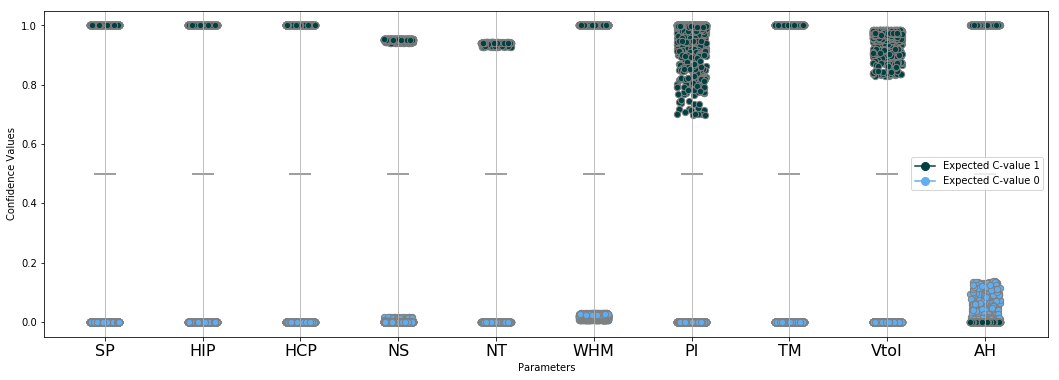

In [7]:
#parameter_names = [p for p in parameter_names if p not in SKIPPED_PARAMS]

plt.rcParams['figure.figsize'] = 18, 6
fig, ax = plt.subplots(1,1) 

param_subset = [p for p in parameter_names
               if p not in PARAMS_NOT_IMPLEMENTED]

lang_means = df.groupby('lang')[param_subset].mean()
lang_means['lang'] = lang_means.index
circle_size = 40

closed_circle_color = '#60aef0'
open_circle_color = '#004040'

for index, param in enumerate(param_subset):
    
    param_is_on = np.bitwise_and(param_name_to_int(param), lang_means.lang).gt(0)
    expected_zero = lang_means[~param_is_on]
    expected_one = lang_means[param_is_on]
    
    # the closed circles
    ax.scatter(x=index + jiggle(len(expected_zero), 0.3) + 0,
               y=expected_zero[param], 
               marker='o', 
               s=circle_size,
               edgecolors='gray',
               facecolors=closed_circle_color)
    
    # the open circles
    ax.scatter(x=index + jiggle(len(expected_one), 0.3) - 0,
                y=expected_one[param], 
                marker='o', 
                s=circle_size,
                edgecolors='grey',
                facecolors=open_circle_color)

plt.scatter(np.arange(len(param_subset)),
            np.repeat(0.5, len(param_subset)),
            color='black',
            alpha=0.5,
            s=500,
            marker='_')
                      
    
ax.set_xticks(np.arange(0, len(param_subset)))
ax.set_xticklabels(param_subset, fontsize=16, )

plt.ylim(-0.05, 1.05) 
plt.grid(axis='x')

plot_margin = 1

x0, x1, y0, y1 = plt.axis()
# plt.axis((x0 + 1,
#           x1 + plot_margin,
#           y0,
#           y1));
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

closed_circle_legend = mlines.Line2D([], [], color=closed_circle_color, 
                          marker='o',
                          markersize=8, 
                          label='Expected C-value 0')

open_circle_legend = mlines.Line2D([], [], color=open_circle_color, 
                          marker='o',
                          markersize=8, 
                          label='Expected C-value 1')

plt.legend(handles=[open_circle_legend, closed_circle_legend])
plt.xlabel('Parameters')
plt.ylabel('Confidence Values');